In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import statsmodels.api as sm

df = pd.read_csv('https://raw.githubusercontent.com/luposlednik/fiap2TBDS/main/venda.csv')
df

,Unnamed: 0,X,date,mes,weekday,margem,venda,desconto,outdesc,outmg
0,1,1,20140801,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0
1,2,2,20140802,agosto,sabado,0.416022,58377.320,5713.043012,0,0
2,3,3,20140803,agosto,domingo,0.431993,64635.390,8621.708915,0,0
3,4,4,20140804,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0
4,5,5,20140805,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0
...,...,...,...,...,...,...,...,...,...,...
391,392,392,20150827,agosto,quinta-feira,0.451562,NaN,5846.133551,0,0
392,393,393,20150828,agosto,sexta-feira,0.472608,NaN,2657.847261,0,0
393,394,394,20150829,agosto,sabado,0.385612,NaN,269.530000,0,0
394,395,395,20150830,agosto,domingo,0.495615,NaN,3434.838118,0,0


In [ ]:
# Após analisar a porcentagem de valores NaN de cada coluna, decidimos dropar as colunas frequency2, amount e a frequency1 
# por que ao analisarmos a porcentagem de cada coluna, a coluna frequency1 tem 56% dos valores NaN, frequency2 possui 81% e a amount 
# também possui 81%.
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('X', axis=1)

In [ ]:
#Verificar dados categoricos e preenchimento
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      396 non-null    int64  
 1   mes       396 non-null    object 
 2   weekday   396 non-null    object 
 3   margem    396 non-null    float64
 4   venda     365 non-null    float64
 5   desconto  396 non-null    float64
 6   outdesc   396 non-null    int64  
 7   outmg     396 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 24.9+ KB


In [ ]:
## Essa função pega apenas as colunas que possuem valores NaN. Para tratar a coluna Result vamos usar outro método.
def calcula_percentual_indefinido(dataframe, coluna ):
    indefinidos = dataframe.loc[pd.isna(dataframe[coluna]), coluna].shape[0]
    #total = dataframe.idade.shape[0]
    total = dataframe[coluna].shape[0]

    return (indefinidos/total)* 100

In [ ]:
print('Valores NaN na coluna date:', calcula_percentual_indefinido(df, 'date'))
print('Valores NaN na coluna mes:', calcula_percentual_indefinido(df, 'mes'))
print('Valores NaN na coluna weekday:', calcula_percentual_indefinido(df, 'weekday'))
print('Valores NaN na coluna margem:', calcula_percentual_indefinido(df, 'margem'))
print('Valores NaN na coluna venda:', calcula_percentual_indefinido(df, 'venda'))
print('Valores NaN na coluna desconto:', calcula_percentual_indefinido(df, 'desconto'))
print('Valores NaN na coluna outdesc:', calcula_percentual_indefinido(df, 'outdesc'))
print('Valores NaN na coluna outmg:', calcula_percentual_indefinido(df, 'outmg'))

Valores NaN na coluna date: 0.0
Valores NaN na coluna mes: 0.0
Valores NaN na coluna weekday: 0.0
Valores NaN na coluna margem: 0.0
Valores NaN na coluna venda: 7.828282828282829
Valores NaN na coluna desconto: 0.0
Valores NaN na coluna outdesc: 0.0
Valores NaN na coluna outmg: 0.0


#Substituir valor NAN pela media caso seja necessario

In [ ]:
# #Substituir valor de venda pela média caso seja necessario
# vendaMed = df['venda'].mean()
# df['venda'] = df['venda'].fillna(vendaMed)
# df.describe()

#Verificar se existe ainda linhas NAN

In [ ]:
print('Valores NaN na coluna date:', calcula_percentual_indefinido(df, 'date'))
print('Valores NaN na coluna mes:', calcula_percentual_indefinido(df, 'mes'))
print('Valores NaN na coluna weekday:', calcula_percentual_indefinido(df, 'weekday'))
print('Valores NaN na coluna margem:', calcula_percentual_indefinido(df, 'margem'))
print('Valores NaN na coluna venda:', calcula_percentual_indefinido(df, 'venda'))
print('Valores NaN na coluna desconto:', calcula_percentual_indefinido(df, 'desconto'))
print('Valores NaN na coluna outdesc:', calcula_percentual_indefinido(df, 'outdesc'))
print('Valores NaN na coluna outmg:', calcula_percentual_indefinido(df, 'outmg'))

Valores NaN na coluna date: 0.0
Valores NaN na coluna mes: 0.0
Valores NaN na coluna weekday: 0.0
Valores NaN na coluna margem: 0.0
Valores NaN na coluna venda: 7.828282828282829
Valores NaN na coluna desconto: 0.0
Valores NaN na coluna outdesc: 0.0
Valores NaN na coluna outmg: 0.0


#Valores unique

In [ ]:
#Colunas date	mes	weekday	margem	venda	desconto	outdesc	outmg
print(df.mes.unique())
print(df.weekday.unique())
print(df.outdesc.unique())
print(df.outmg.unique())

['agosto' 'setembro' 'outubro' 'novembro' 'dezembro' 'janeiro' 'fevereiro'
 'mar?o' 'abril' 'maio' 'junho' 'julho']
['sexta-feira' 'sabado' 'domingo' 'segunda-feira' 'terca-feira'
 'quarta-feira' 'quinta-feira']
[0 1]
[0 1]


In [ ]:
#Ajustando valor de mar?o para marco
df = df.replace(to_replace ="mar?o",
                 value ="marco")

#Agrupamentos dos resultados categoricos

In [ ]:
agrupado = df.groupby(['outdesc']).size()
agrupado

outdesc
0    393
1      3
dtype: int64

In [ ]:
agrupado = df.groupby(['outmg']).size()
agrupado

outmg
0    394
1      2
dtype: int64

In [ ]:
agrupado = df.groupby(['mes']).size()
agrupado

mes
abril        30
agosto       62
dezembro     31
fevereiro    28
janeiro      31
julho        31
junho        30
maio         31
marco        31
novembro     30
outubro      31
setembro     30
dtype: int64

In [ ]:
agrupado = df.groupby(['weekday']).size()
agrupado

weekday
domingo          57
quarta-feira     56
quinta-feira     56
sabado           57
segunda-feira    57
sexta-feira      57
terca-feira      56
dtype: int64

In [ ]:
explore_week = df.groupby('weekday').agg(venda = pd.NamedAgg(column = 'venda', aggfunc = np.sum), 
                                                       desconto = pd.NamedAgg(column = 'desconto',aggfunc = np.sum),) \
                                                       .sort_values('venda').reset_index()
explore_week

,weekday,venda,desconto
0,sabado,2.739076e+06,273994.754287
1,domingo,3.085857e+06,298913.328805
2,quinta-feira,4.259387e+06,422693.210535
3,sexta-feira,4.395753e+06,417573.231127
4,terca-feira,4.767732e+06,396527.985212
5,quarta-feira,4.773230e+06,422414.311606
6,segunda-feira,5.404593e+06,434997.716436


#Features

In [ ]:
'''
O próximo passo é normalizar os valores escalares. Vamos normalizar pela média, isto
é, vamos aplicar a seguinte transformação:

  Xnovo = (Xatual - Xmédio)/ (Xmax - Xmin)

'''
def normaliza_media(valores):
    media = np.mean(valores)
    minimo = np.min(valores)
    maximo = np.max(valores)
    return (valores - media)/(maximo-minimo)

In [ ]:
df

,date,mes,weekday,margem,venda,desconto,outdesc,outmg
0,20140801,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0
1,20140802,agosto,sabado,0.416022,58377.320,5713.043012,0,0
2,20140803,agosto,domingo,0.431993,64635.390,8621.708915,0,0
3,20140804,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0
4,20140805,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0
...,...,...,...,...,...,...,...,...
391,20150827,agosto,quinta-feira,0.451562,NaN,5846.133551,0,0
392,20150828,agosto,sexta-feira,0.472608,NaN,2657.847261,0,0
393,20150829,agosto,sabado,0.385612,NaN,269.530000,0,0
394,20150830,agosto,domingo,0.495615,NaN,3434.838118,0,0


#Variaveis dummies

In [ ]:
#df.gender = [one_hot(df.gender, _) for _ in df.gender]
dummies_mes = pd.get_dummies(df['mes'])
df['agosto'] = dummies_mes['agosto']##Possuem muitos resultados 1
df['setembro'] = dummies_mes['setembro']##Possuem muitos resultados 1
df['outubro'] = dummies_mes['outubro']
df['novembro'] = dummies_mes['novembro']
df['dezembro'] = dummies_mes['dezembro']
df['janeiro'] = dummies_mes['janeiro']
df['fevereiro'] = dummies_mes['fevereiro']
df['marco'] = dummies_mes['marco']
df['abril'] = dummies_mes['abril']
df['maio'] = dummies_mes['maio']
df['junho'] = dummies_mes['junho']
df['julho'] = dummies_mes['julho']

In [ ]:
dummies_week = pd.get_dummies(df['weekday'])
df['sexta-feira'] = dummies_week['sexta-feira']##Possuem muitos resultados 1
df['sabado'] = dummies_week['sabado']#Possuem muitos resultados 1
df['domingo'] = dummies_week['domingo']
df['segunda-feira'] = dummies_week['segunda-feira']
df['terca-feira'] = dummies_week['terca-feira']
df['quarta-feira'] = dummies_week['quarta-feira']
df['quinta-feira'] = dummies_week['quinta-feira']

#Base ajustada

In [ ]:
#df = df.drop('mes', axis=1)
#df = df.drop('weekday', axis=1)

In [ ]:
df.head()

,date,mes,weekday,margem,venda,desconto,outdesc,outmg,agosto,setembro,...,maio,junho,julho,sexta-feira,sabado,domingo,segunda-feira,terca-feira,quarta-feira,quinta-feira
0,20140801,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,20140802,agosto,sabado,0.416022,58377.320,5713.043012,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,20140803,agosto,domingo,0.431993,64635.390,8621.708915,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,20140804,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,20140805,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


#Matriz de correlação

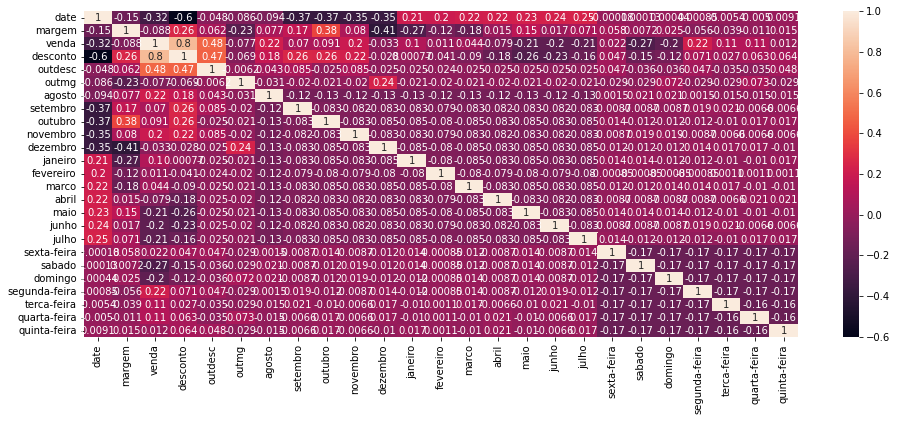

In [ ]:
# Matriz de correlação Gráfica
plt.figure(figsize=(16, 6))
sn.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           396 non-null    int64  
 1   mes            396 non-null    object 
 2   weekday        396 non-null    object 
 3   margem         396 non-null    float64
 4   venda          365 non-null    float64
 5   desconto       396 non-null    float64
 6   outdesc        396 non-null    int64  
 7   outmg          396 non-null    int64  
 8   agosto         396 non-null    uint8  
 9   setembro       396 non-null    uint8  
 10  outubro        396 non-null    uint8  
 11  novembro       396 non-null    uint8  
 12  dezembro       396 non-null    uint8  
 13  janeiro        396 non-null    uint8  
 14  fevereiro      396 non-null    uint8  
 15  marco          396 non-null    uint8  
 16  abril          396 non-null    uint8  
 17  maio           396 non-null    uint8  
 18  junho     

In [ ]:
df.shape
a = (396/10)*3
b = (396/10)*7
print(a,b)

118.80000000000001 277.2


#Dia dos Pais (2.º domingo de agosto)
#Dia das mães domingo , 14 de maio
#meses que só tem 31 dias ou só 30
#todos os meses anteriores com 31 dias(ja testamos)

In [ ]:
df

,date,mes,weekday,margem,venda,desconto,outdesc,outmg,agosto,setembro,...,maio,junho,julho,sexta-feira,sabado,domingo,segunda-feira,terca-feira,quarta-feira,quinta-feira
0,20140801,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,20140802,agosto,sabado,0.416022,58377.320,5713.043012,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,20140803,agosto,domingo,0.431993,64635.390,8621.708915,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,20140804,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,20140805,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,20150827,agosto,quinta-feira,0.451562,NaN,5846.133551,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
392,20150828,agosto,sexta-feira,0.472608,NaN,2657.847261,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
393,20150829,agosto,sabado,0.385612,NaN,269.530000,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
394,20150830,agosto,domingo,0.495615,NaN,3434.838118,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df = df.drop([145,149])
df = df.reset_index(drop=True)
df

,date,mes,weekday,margem,venda,desconto,outdesc,outmg,agosto,setembro,...,maio,junho,julho,sexta-feira,sabado,domingo,segunda-feira,terca-feira,quarta-feira,quinta-feira
0,20140801,agosto,sexta-feira,0.406111,110042.460,9190.907534,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,20140802,agosto,sabado,0.416022,58377.320,5713.043012,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,20140803,agosto,domingo,0.431993,64635.390,8621.708915,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,20140804,agosto,segunda-feira,0.409216,140417.321,18312.965640,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,20140805,agosto,terca-feira,0.449648,149700.286,19942.741300,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,20150827,agosto,quinta-feira,0.451562,NaN,5846.133551,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
390,20150828,agosto,sexta-feira,0.472608,NaN,2657.847261,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
391,20150829,agosto,sabado,0.385612,NaN,269.530000,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
392,20150830,agosto,domingo,0.495615,NaN,3434.838118,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
treino = df.iloc[0:362]
teste  = df.iloc[363:]


Y = treino.iloc[:,[4]]

#X = treino.loc[:,['date','margem','desconto','agosto',	'setembro',	'outubro',	'novembro',	'dezembro',	'janeiro',	'fevereiro',	'marco',	'abril',	'maio',	'junho',	'julho'] ]
#X = treino.loc[:,['desconto','margem','date','agosto'] ]
#X = treino.loc[:,['date'] ]
X = treino.loc[:,['agosto','desconto','margem'] ]
#X_prev = teste.loc[:,['date','margem','desconto','agosto',	'setembro',	'outubro',	'novembro',	'dezembro',	'janeiro',	'fevereiro',	'marco',	'abril',	'maio',	'junho',	'julho'] ]
#X_prev = teste.loc[:,['desconto','margem','date','agosto'] ]
#X_prev = teste.loc[:,['date'] ]
X_prev = teste.loc[:,['agosto','desconto','margem'] ]

In [ ]:
teste

,date,mes,weekday,margem,venda,desconto,outdesc,outmg,agosto,setembro,...,maio,junho,julho,sexta-feira,sabado,domingo,segunda-feira,terca-feira,quarta-feira,quinta-feira
363,20150801,agosto,sabado,0.433052,NaN,3315.192880,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
364,20150802,agosto,domingo,0.437401,NaN,3631.240000,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
365,20150803,agosto,segunda-feira,0.416075,NaN,3753.040004,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
366,20150804,agosto,terca-feira,0.385379,NaN,2523.500013,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
367,20150805,agosto,quarta-feira,0.389125,NaN,5285.936265,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
368,20150806,agosto,quinta-feira,0.371438,NaN,4415.980000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
369,20150807,agosto,sexta-feira,0.418109,NaN,3803.310997,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
370,20150808,agosto,sabado,0.372597,NaN,1764.178118,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
371,20150809,agosto,domingo,0.415690,NaN,1712.850000,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
372,20150810,agosto,segunda-feira,0.422504,NaN,4604.669365,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


#modelo 1

In [ ]:
#modelo 1
# Construção do modelo de regressão Linear 
mod1 = LinearRegression()
mod1.fit(X,Y)
# Preparação da base de teste para previsão utilizando o modelo de regressão
Y_prev = mod1.predict(X_prev)
Y_real = teste.iloc[:,[4]].to_numpy()

# Calculo do erro de previsão
erro = Y_real - Y_prev
# Calculo do erro absoluto médio
erro_abs_medio = np.mean(abs(erro))
print(erro_abs_medio)
# Calculo do erro relativo (percentual)
erro_medio_perc = erro_abs_medio/np.mean(Y_real)
print(erro_medio_perc)

nan
nan


In [ ]:
df_prev = pd.DataFrame(Y_prev)
df_prev

,0
0,32874.669145
1,33565.318725
2,42753.865172
3,45410.116942
4,64740.033366
5,65055.586219
6,42343.192217
7,44655.365206
8,27553.903595
9,46667.562310


In [ ]:
df_prev.to_csv('14.csv',sep=',')

#Resultados finais dos algoritmos

-O modelo que apresentou melhor resultado foi o modelo 2
1.   ['desconto','margem','agosto']

-A hiposete que melhor descreve esse modelo é pois retirar os outliers que não fazem sentido para o modelo. Mantendo apenas os de desconto, pois existe um dia em agosto que queremos prever que existe esse outlier.